In [11]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [32]:
df = pd.read_csv("./file/3_27/500000/rr.csv", sep=",")
df = df.drop(['Unnamed: 15'], axis=1)  
df

,time,dcName,requestNum,finishedRequestNum,dcUsage,dcConsume,dcPrice,reSupply,reUsage,reDcUsage,reBaUsage,rePrice,baSupply,baPrice,cost
0,0,DC_CR,104206,104206,0.811,41570.323,0.000,51465.856,1.0,0.808,0.193,8420.112,9895.534,0.000,8420.112
1,0,DC_OS,104204,104204,0.607,44350.379,0.353,41810.993,1.0,1.000,0.000,1672.440,0.000,0.000,1672.793
2,0,DC_MB,104201,104201,0.762,55687.688,5.237,17987.640,1.0,1.000,0.000,7964.263,0.000,0.000,7969.499
3,0,DC_SH,104198,104198,0.710,46957.125,2.672,27719.627,1.0,1.000,0.000,26699.845,0.000,0.000,26702.517
4,0,DC_LA,104195,104195,0.664,41925.846,4.468,9759.892,1.0,1.000,0.000,8783.903,0.000,0.000,8788.371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,604800,DC_CR,104155,128640,1.000,45900.000,0.000,51633.411,1.0,0.889,0.112,3943.555,5733.411,0.000,3943.555
5041,604800,DC_OS,104150,104150,0.607,44348.673,0.452,41097.979,1.0,1.000,0.000,1643.920,0.000,0.000,1644.371
5042,604800,DC_MB,104144,104144,0.762,55677.000,0.000,30641.895,1.0,1.000,0.000,4166.054,-25035.105,0.696,4166.750
5043,604800,DC_SH,104144,104144,0.710,46947.000,3.308,23133.363,1.0,1.000,0.000,17733.496,0.000,0.000,17736.804


In [33]:
df_CR = df.loc[df['dcName'] == 'DC_CR'].reset_index()
df_OS = df.loc[df['dcName'] == 'DC_OS'].reset_index()
df_SH = df.loc[df['dcName'] == 'DC_SH'].reset_index()
df_MB = df.loc[df['dcName'] == 'DC_MB'].reset_index()
df_LA = df.loc[df['dcName'] == 'DC_LA'].reset_index()

能耗

In [17]:
df_DcConsume = pd.DataFrame({'CR':df_CR['dcConsume'], 'MB':df_MB['dcConsume'], 'OS':df_OS['dcConsume'], 'SH':df_SH['dcConsume'], 'LA':df_LA['dcConsume']})

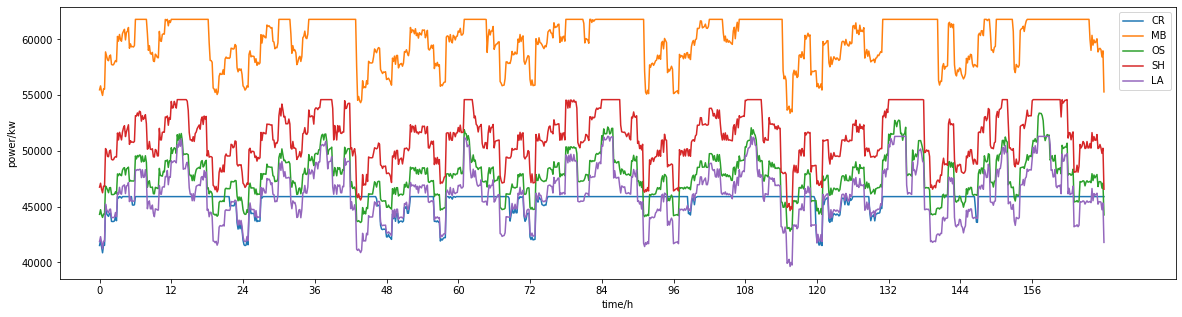

In [18]:
df_DcConsume.plot(figsize= (20, 5))
plt.xlim(-40, 1080)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.xlabel("time/h")
plt.ylabel("power/kw")
plt.legend(loc = 1)
plt.show()

In [15]:
df_RequestNum = pd.DataFrame({'CR':df_CR['requestNum'], 'OS':df_OS['requestNum'], 'MB':df_MB['requestNum'], 'SH':df_SH['requestNum'], 'LA':df_LA['requestNum']})

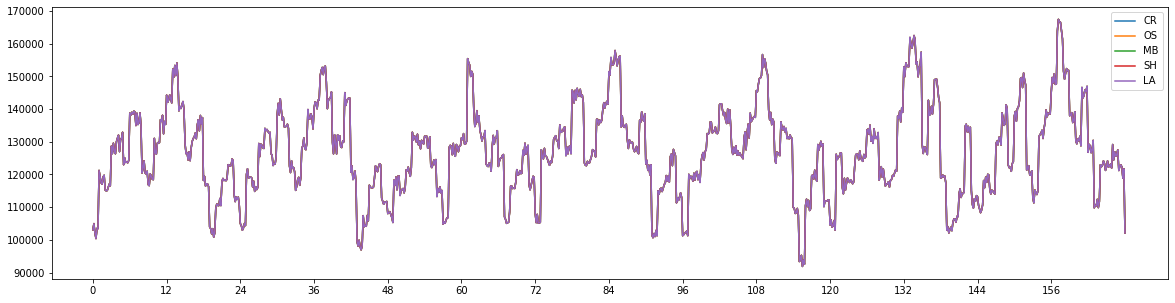

In [16]:
df_RequestNum.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [13]:
df_FinishedRequestNum = pd.DataFrame({'CR':df_CR['finishedRequestNum'], 'OS':df_OS['finishedRequestNum'], 'MB':df_MB['finishedRequestNum'], 'SH':df_SH['finishedRequestNum'], 'LA':df_LA['finishedRequestNum']})

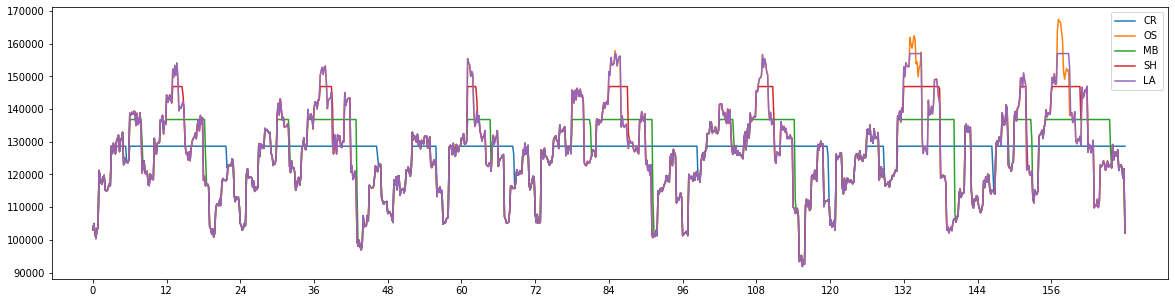

In [14]:
df_FinishedRequestNum.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [34]:
df_BaSupply = pd.DataFrame({'CR':df_CR['baSupply'], 'MB':df_MB['baSupply'], 'OS':df_OS['baSupply'], 'SH':df_SH['baSupply'], 'LA':df_LA['baSupply']})

In [35]:
#for i in [216]
df_BaSupply['LA'][216:288].sum()

-124678.776

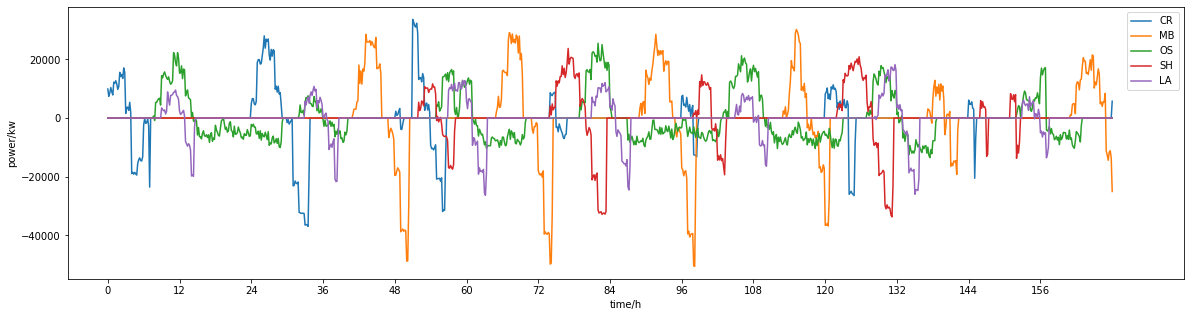

In [36]:
df_BaSupply.plot(figsize= (20, 5))
plt.xlim(-40, 1080)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.xlabel("time/h")
plt.ylabel("power/kw")
plt.legend(loc = 1)
plt.show()

In [19]:
df_DcPrice = pd.DataFrame({'CR':df_CR['dcPrice'], 'MB':df_MB['dcPrice'], 'OS':df_OS['dcPrice'], 'SH':df_SH['dcPrice'], 'LA':df_LA['dcPrice']})

In [20]:
df_DcPrice = df_DcPrice * 2

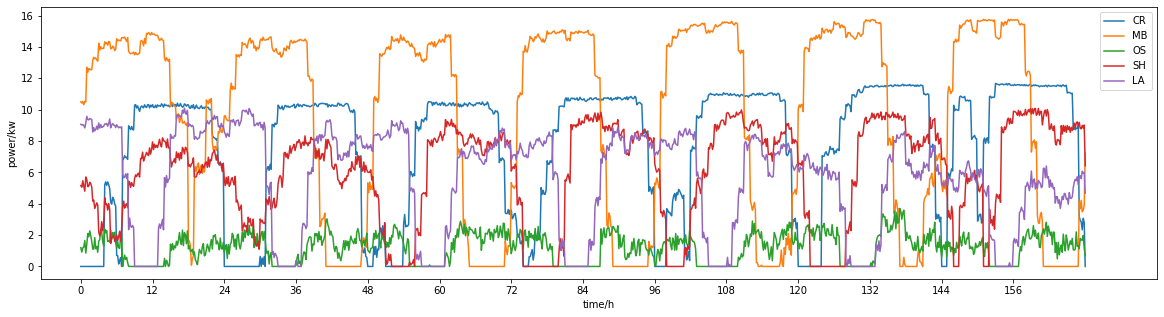

In [21]:
df_DcPrice.plot(figsize= (20, 5))
plt.xlim(-40, 1080)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.xlabel("time/h")
plt.ylabel("power/kw")
plt.legend(loc = 1)
plt.show()

In [26]:
df_RePrice = pd.DataFrame({'CR':df_CR['rePrice'], 'OS':df_OS['rePrice'], 'MB':df_MB['rePrice'], 'SH':df_SH['rePrice'], 'LA':df_LA['rePrice']})

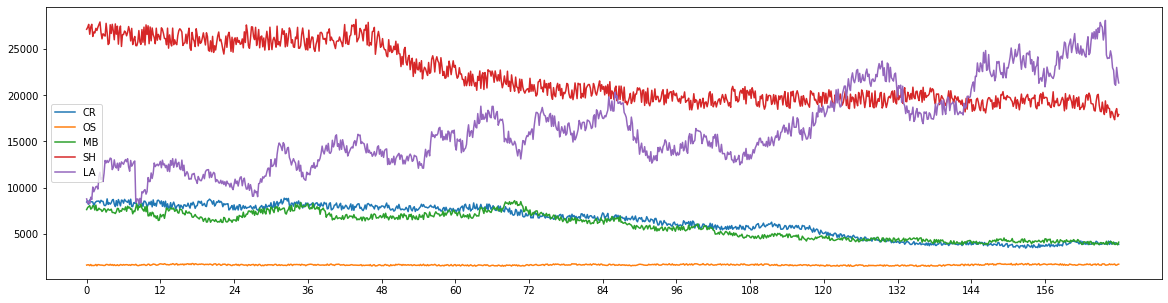

In [7]:
df_RePrice.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [24]:
df_Cost = pd.DataFrame({'CR':df_CR['cost'], 'OS':df_OS['cost'], 'MB':df_MB['cost'], 'SH':df_SH['cost'], 'LA':df_LA['cost']})

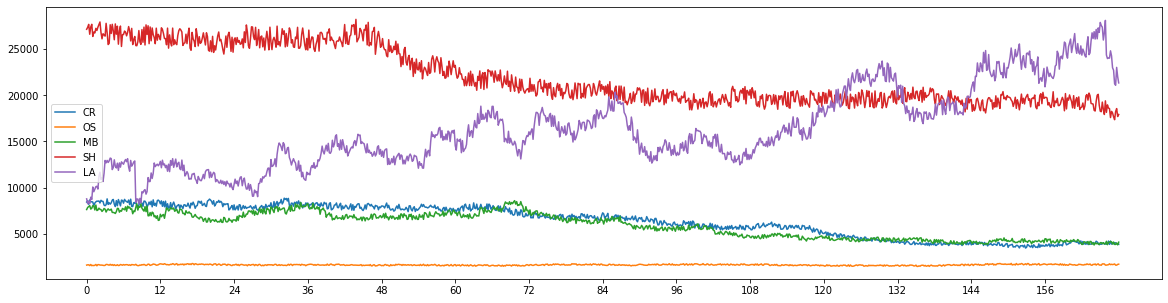

In [25]:
df_Cost.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [26]:
df_ReUsage = pd.DataFrame({'CR':df_CR['reUsage'], 'OS':df_OS['reUsage'], 'MB':df_MB['reUsage'], 'SH':df_SH['reUsage'], 'LA':df_LA['reUsage']})

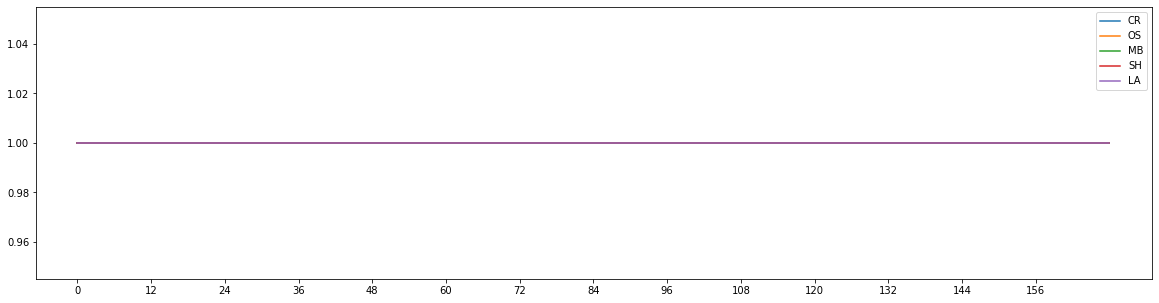

In [27]:
df_ReUsage.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

<AxesSubplot:>

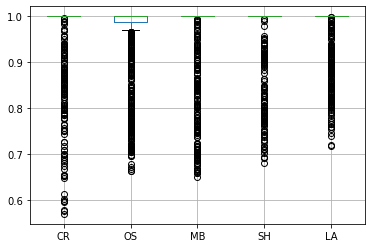

In [6]:
df_ReDcUsage = pd.DataFrame({'CR':df_CR['reDcUsage'], 'OS':df_OS['reDcUsage'], 'MB':df_MB['reDcUsage'], 'SH':df_SH['reDcUsage'], 'LA':df_LA['reDcUsage']})
df_ReDcUsage.boxplot()

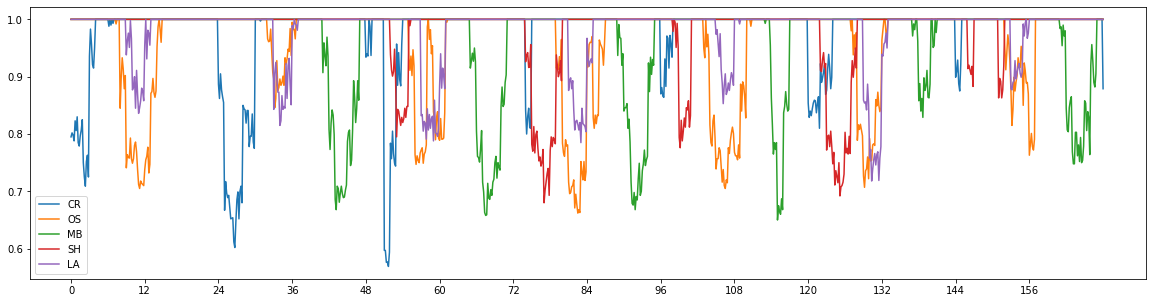

In [9]:
df_ReDcUsage.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [27]:
df_RePrice

,CR,OS,MB,SH,LA
0,8446.215,1614.998,7624.391,27152.276,8781.672
1,8580.566,1641.310,7850.049,27363.850,8259.134
2,8202.995,1643.932,7953.607,27681.385,8510.697
3,8665.567,1559.155,8049.278,26612.735,8270.547
4,8452.234,1677.930,7674.252,27396.593,8960.169
...,...,...,...,...,...
1004,4027.727,1735.420,3854.269,17357.203,21255.724
1005,4025.957,1606.199,3852.137,18241.433,21087.819
1006,3921.500,1606.673,4006.208,18561.213,23024.424
1007,3881.610,1687.374,3806.346,17702.181,22013.556


In [29]:
df_RePrice

,CR,OS,MB,SH,LA
0,6714.740925,1614.998,7624.391,27152.276,8781.672
1,6881.613932,1641.310,7850.049,27363.850,8259.134
2,6545.990010,1643.932,7953.607,27681.385,8510.697
3,6828.466796,1559.155,8049.278,26612.735,8270.547
4,6956.188582,1677.930,7674.252,27396.593,8960.169
...,...,...,...,...,...
1004,4027.727000,1735.420,3854.269,17357.203,21255.724
1005,4025.957000,1606.199,3852.137,18241.433,21087.819
1006,3921.500000,1606.673,4006.208,18561.213,23024.424
1007,3881.610000,1687.374,3806.346,17702.181,22013.556


In [12]:
df_ReDcUsage

,CR,OS,MB,SH,LA
0,0.795,1.0,1.0,1.0,1.0
1,0.802,1.0,1.0,1.0,1.0
2,0.798,1.0,1.0,1.0,1.0
3,0.788,1.0,1.0,1.0,1.0
4,0.823,1.0,1.0,1.0,1.0
...,...,...,...,...,...
1004,1.000,1.0,1.0,1.0,1.0
1005,1.000,1.0,1.0,1.0,1.0
1006,1.000,1.0,1.0,1.0,1.0
1007,1.000,1.0,1.0,1.0,1.0


In [28]:
names = ['CR', 'OS', 'MB', 'SH', 'LA']
for name in names:
    for i in range(len(df_RePrice[name])):
        df_RePrice[name][i] = df_RePrice[name][i] * df_ReDcUsage[name][i]

In [33]:
df_RePrice = df_RePrice / 100

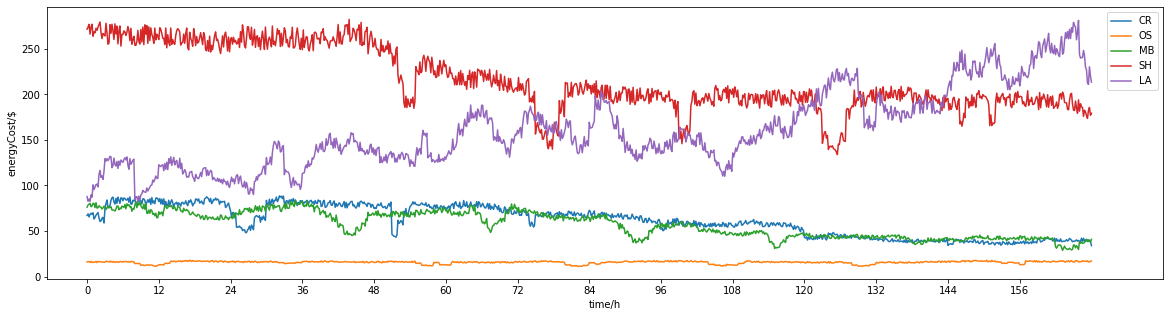

In [35]:
df_RePrice.plot(figsize= (20, 5))
plt.xlim(-40, 1080)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.xlabel("time/h")
plt.ylabel("energyCost/$")
plt.legend(loc = 1)
plt.show()

In [4]:
df_ReSupply = pd.DataFrame({'CR':df_CR['reSupply'], 'MB':df_MB['reSupply'], 'OS':df_OS['reSupply'], 'SH':df_SH['reSupply'], 'LA':df_LA['reSupply']})

In [7]:
names = ['CR', 'OS', 'MB', 'SH', 'LA']
for name in names:
    for i in range(len(df_ReSupply[name])):
        df_ReSupply[name][i] = df_ReSupply[name][i] * df_ReDcUsage[name][i]

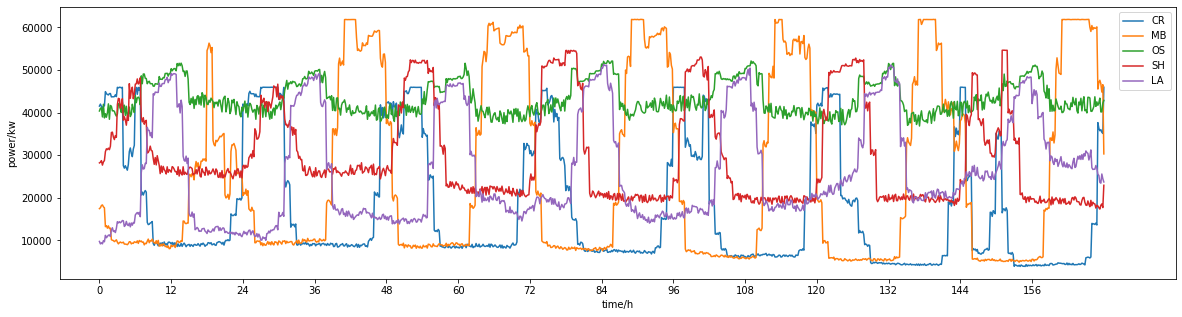

In [10]:
df_ReSupply.plot(figsize= (20, 5))
plt.xlim(-40, 1080)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.xlabel("time/h")
plt.ylabel("power/kw")
plt.legend(loc = 1)
plt.show()